In [1]:
### Data Analisy Libraries ###
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import inflection

### Machine Learning Libraries ###
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler , RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, mean_squared_error, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, VarianceThreshold, SelectPercentile
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.ensemble      import RandomForestRegressor
from boruta                import BorutaPy

from math import ceil
from pivottablejs import pivot_ui

#auxiliar packages
from IPython.display         import Image
from IPython.core.display    import HTML
from scipy                   import stats

import pickle
import warnings
import json
import os
warnings.filterwarnings('ignore')


ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection
You should consider upgrading via the 'c:\users\viviane\.pyenv\pyenv-win\versions\3.9.1\python.exe -m pip install --upgrade pip' command.


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    accent = lambda x: inflection.transliterate(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_old = list(map(accent, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df.columns = cols_new
    return df



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [ ]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [9]:
data_train_raw = pd.read_csv('C:\\Users\\Viviane\\OneDrive\\workspace\\repositories\\5-hackdays-comunidade-ds\\instyle-nps\\train.csv')

In [10]:
data = data_train_raw.copy()

In [11]:
data = rename_columns(data)

In [13]:
data.head(10)

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.00,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.00,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.00,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.00,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.00,Satisfied
5,111157,Female,Loyal Customer,26,Personal,Medium,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.00,Neutral or Dissatisfaction
6,82113,Male,Loyal Customer,47,Personal,Medium,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.00,Neutral or Dissatisfaction
7,96462,Female,Loyal Customer,52,Gift,Large,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.00,Satisfied
8,79485,Female,Loyal Customer,41,Gift,Large,853,1,2,2,...,1,1,2,1,4,1,2,0,0.00,Neutral or Dissatisfaction
9,65725,Male,disloyal Customer,20,Gift,Medium,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.00,Neutral or Dissatisfaction


In [14]:
data.describe()

,id,age,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
count,"103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,904.00","103,594.00"
mean,"64,924.21",39.38,"1,189.45",2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,"37,463.81",15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,"32,533.75",27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,"64,856.50",40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,"97,368.25",51.00,"1,743.00",4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,"129,880.00",85.00,"4,983.00",5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,"1,592.00","1,584.00"


In [15]:
data.isna().sum()

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
in_store_wifi                   0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self_store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

In [19]:
print(data.shape)

(103904, 24)


In [26]:
# Split categoricals and  numerical data
num_attributes = data.select_dtypes( include=['int64', 'float64'] )
cat_attributes = data.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [25]:
# Understanding better categoricals data
cat_attributes.head()

,gender,customer_type,type_of_purchase,store_size,satisfaction
0,Male,Loyal Customer,Personal,Small,Neutral or Dissatisfaction
1,Male,disloyal Customer,Gift,Large,Neutral or Dissatisfaction
2,Female,Loyal Customer,Gift,Large,Satisfied
3,Female,Loyal Customer,Gift,Large,Neutral or Dissatisfaction
4,Male,Loyal Customer,Gift,Large,Satisfied
5,Female,Loyal Customer,Personal,Medium,Neutral or Dissatisfaction
6,Male,Loyal Customer,Personal,Medium,Neutral or Dissatisfaction
7,Female,Loyal Customer,Gift,Large,Satisfied
8,Female,Loyal Customer,Gift,Large,Neutral or Dissatisfaction
9,Male,disloyal Customer,Gift,Medium,Neutral or Dissatisfaction


In [22]:
# How many types of responses for each data
"gender = Female, Male"
"type_of_purchase = Loyal and disloyal"
"store_size = Large, Medium, Small"
"satisfaction = Satisfied, Neutral or Dissatisfaction"

cat_attributes.apply( lambda x: x.unique().shape[0] )

gender              2
customer_type       2
type_of_purchase    2
store_size          3
satisfaction        2
dtype: int64

In [27]:
set(cat_attributes['satisfaction'])

{'Neutral or Dissatisfaction', 'Satisfied'}

In [28]:
cat_attributes.columns

Index(['gender', 'customer_type', 'type_of_purchase', 'store_size',
       'satisfaction'],
      dtype='object')

In [29]:
num_attributes.head()

,id,age,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.00
1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.00
2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.00
3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.00
4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.00


In [46]:
data['satisfaction'].value_counts()
#data['type_of_purchase'].value_counts()
data['store_size'].value_counts()
data['type_of_purchase'].value_counts()
data['customer_type'].value_counts()

customer_type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [34]:
data.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.00,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.00,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.00,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.00,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.00,Satisfied


In [35]:
df1 = data.copy()

In [36]:
le = LabelEncoder()
df1['gender'] = le.fit_transform( df1['gender'] )
df1['customer_type'] = le.fit_transform( df1['customer_type'] )
df1['type_of_purchase'] = le.fit_transform( df1['type_of_purchase'] )
df1['store_size'] = le.fit_transform( df1['store_size'] )
df1['satisfaction'] = le.fit_transform( df1['satisfaction'] )

In [39]:
df1

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.00,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.00,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.00,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.00,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,0,1,23,0,1,192,2,1,2,...,2,3,1,4,2,3,2,3,0.00,0
103900,73097,1,0,49,0,0,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.00,1
103901,68825,1,1,30,0,0,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.00,0
103902,54173,0,1,22,0,1,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.00,0


In [ ]:
# df1['satisfaction'] = df1['satisfaction'].map(satisfaction_dic)

In [37]:
df1.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,...,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.00,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.00,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.00,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.00,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.00,1


In [48]:
df1.isna().sum()

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
in_store_wifi                   0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self_store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

In [49]:
df1 = df1.dropna()

In [54]:
df1['carrier_delay_in_minutes'] = np.log1p(df1['carrier_delay_in_minutes'])
df1['delivery_delay_in_minutes'] = np.log1p(df1['delivery_delay_in_minutes'])
df1['store_distance'] = np.log1p(df1['store_distance'])



df1['grupo1'] = df1['in_store_wifi'] + df1['self_store'] + df1['store_service'] + df1['purchase_service'] + df1['seller_service'] + df1['kids_entertainment'] + df1['store_location']
df1['grupo2'] = df1['open/close_time_convenient'] + df1['dressing_room'] + df1['waiting_room']
df1['grupo3'] = df1['cleanliness'] + df1['toilet_cleaning'] + df1['waiting_room']


bins = [0, 18, 35, 50, float('inf')]  # Faixas etárias
labels = ['1', '2', '3', '4']  # Rótulos para cada faixa etária
df1['age_category'] = pd.cut(df1['age'], bins=bins, labels=labels)

In [ ]:
df1.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'in_store_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [62]:
target = 'satisfaction' 


# selected_features = ['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
#        'store_size', 'store_distance', 'in_store_wifi',
#        'open/close_time_convenient', 'easy_of_online_shopping',
#        'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
#        'kids_entertainment', 'seller_service', 'showroom', 'self_store',
#        'purchase_service', 'store_service', 'cleanliness',
#        'carrier_delay_in_minutes', 'delivery_delay_in_minutes'
     
# ]
selected_features = [ 'customer_type', 'type_of_purchase',
       'store_size', 'store_distance', 'in_store_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes', 'grupo1', 'grupo2','grupo3', 'age_category'
     
]

In [63]:
X = df1[selected_features]
y = df1[target]

In [64]:
seed=7
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state=seed)#, stratify=y
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((82875, 24), (82875,), (20719, 24), (20719,))

In [65]:
def CM(y, prediction):
    print("Confusion Matrix:")
    labels = ["Satisfied", "Neutral or Dissatisfaction"]
    cm = confusion_matrix(y, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="binary", values_format="d")  
    plt.show() 

In [66]:
def CVS(model, X, y):
    
    scoring = {'Accuracy': make_scorer(accuracy_score),
               'Precision': make_scorer(precision_score),
               'f1': make_scorer(f1_score),
            '   Recall': make_scorer(recall_score)}
    
    y_pred = cross_val_predict(model, X, y, cv=Kfold, method='predict')
    print("\n")      
    CM(y,y_pred) 
    print("\n") 
    scores = cross_validate(model, X, y, cv = Kfold, scoring=scoring)
    for chave, valor in scores.items():
        print(f" {chave} : {valor},  {valor.mean()} +/- {valor.std()}")         

    return y_pred 

In [67]:
number_folds = 4
Kfold = KFold(n_splits=number_folds, shuffle=True, random_state=seed)



Confusion Matrix:


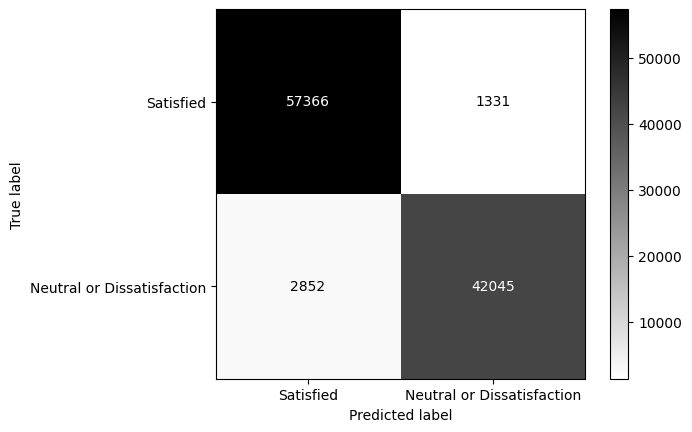



 fit_time : [35.52490425 28.70822453 21.89012098 22.18446112],  27.076927721500397 +/- 5.587231657041946
 score_time : [1.37882495 0.91355538 1.04996586 0.89964628],  1.0604981184005737 +/- 0.1929432431080591
 test_Accuracy : [0.95976679 0.96084791 0.95891575 0.95895436],  0.9596212003369416 +/- 0.000785549486656963
 test_Precision : [0.96834808 0.97053678 0.96947769 0.96890374],  0.9693165729552298 +/- 0.000809827104151255
 test_f1 : [0.953219   0.95410934 0.95155709 0.95154747],  0.9526082266877323 +/- 0.0011018698382941501
 test_   Recall : [0.93855539 0.93822875 0.93428699 0.93480208],  0.9364683018114944 +/- 0.0019358153500077147


array([0, 0, 1, ..., 0, 0, 0])

In [68]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train,y_train)
# y_predict = rf.predict(X_val)
# print("Metrics \n", classification_report(y_val,y_predict))

CVS(rf, X, y)



Confusion Matrix:


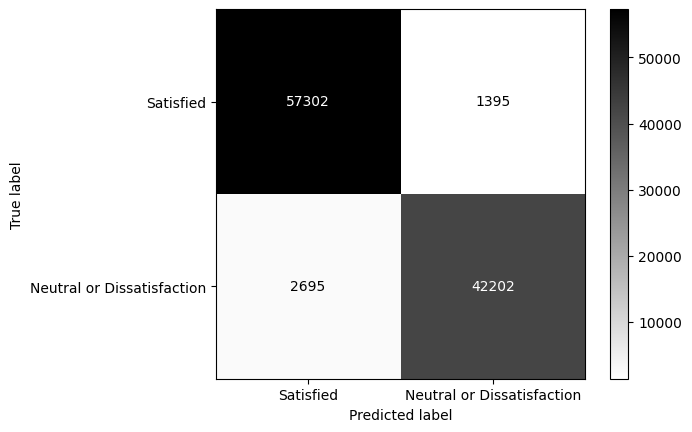



 fit_time : [16.16730213 12.08204269 11.78488636 18.79819632],  14.708106875419617 +/- 2.928289333855163
 score_time : [0.17391896 0.15810847 0.20670938 0.19984102],  0.18464446067810059 +/- 0.019602240533186023
 test_Accuracy : [0.96011429 0.96077069 0.95988107 0.96130975],  0.9605189504500709 +/- 0.0005611104114270352
 test_Precision : [0.96650327 0.96880448 0.96894065 0.96778351],  0.9680079762670686 +/- 0.0009770922580158426
 test_f1 : [0.95373315 0.95409777 0.95277917 0.95451657],  0.9537816627847383 +/- 0.000641747856610829
 test_   Recall : [0.94129608 0.93983089 0.93714797 0.94160845],  0.9399708473364649 +/- 0.0017625447023398536


array([0, 0, 1, ..., 0, 0, 0])

In [94]:
xgb = XGBClassifier(random_state=seed)
xgb.fit(X_train,y_train)

CVS(xgb, X, y)

AttributeError: 'XGBClassifier' object has no attribute 'featureimportances'

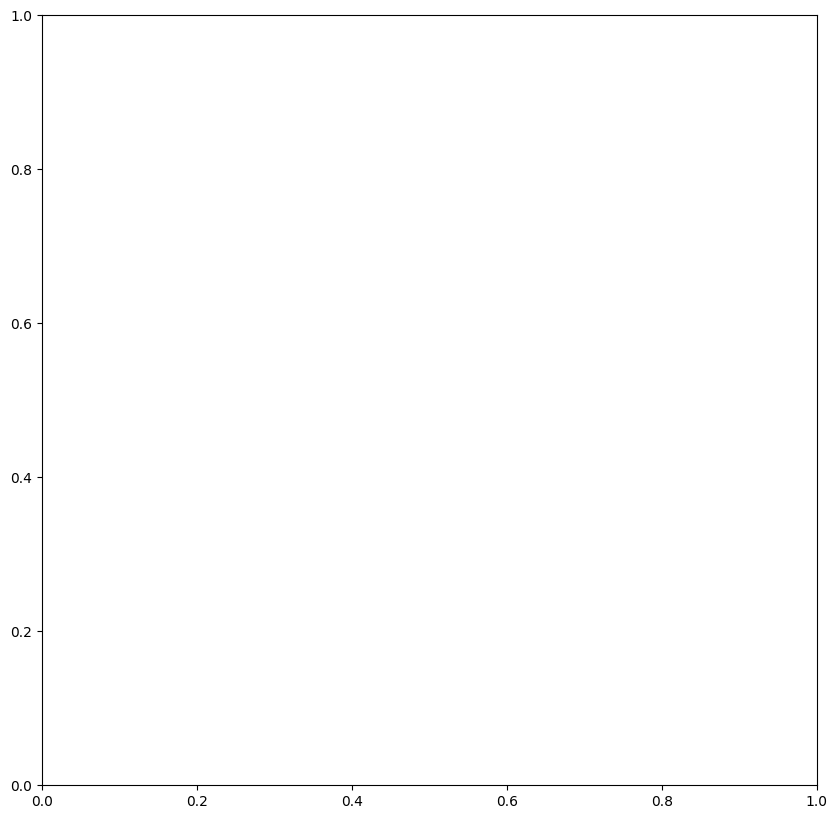

In [96]:
fig, ax = plt.subplots(figsize=(10,10))
sorted_idx = xgb.featureimportances.argsort()
plt.barh(X_train.columns[sorted_idx], xgb.featureimportances[sorted_idx])#max_num_features=50, height=0.8

plt.xlabel("Xgboost Feature Importance")

In [92]:
X['age_category'] = X['age_category'].astype('int64')

In [93]:
X.dtypes

customer_type                   int32
type_of_purchase                int32
store_size                      int32
store_distance                float64
in_store_wifi                   int64
open/close_time_convenient      int64
easy_of_online_shopping         int64
store_location                  int64
toilet_cleaning                 int64
dressing_room                   int64
waiting_room                    int64
kids_entertainment              int64
seller_service                  int64
showroom                        int64
self_store                      int64
purchase_service                int64
store_service                   int64
cleanliness                     int64
carrier_delay_in_minutes      float64
delivery_delay_in_minutes     float64
grupo1                          int64
grupo2                          int64
grupo3                          int64
age_category                    int64
dtype: object

# model prod

In [ ]:
np.random.seed(7)

preds = []
scores = []

params = {'alpha': 6.385986356860096e-05,
  'colsample_bytree': 0.8284784298391914,
  'gamma': 5.114179746041194,
  'lambda': 0.00031417893121740654,
  'learning_rate': 0.21963622374350286,
  'max_depth': 40,
  'min_child_weight': 0.21215371268176095,
  'subsample': 0.89731839369485}

model_xgb_tuned = XGBClassifier(**params)

#{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100}
model_xgb_tuned.fit(X, y)  # yves modificou aqui de (X_train, y_train) para X, y
ypred_xgb_tunned=model_xgb_tuned.predict(X_val)
preds.append(ypred_xgb_tunned)
score = (f1_score(y_val, ypred_xgb_tunned))
scores.append(score)
print("XGBoost Classifier")
print(f"F1:{score}")

print(classification_report(y_val, ypred_xgb_tunned))
print(confusion_matrix(y_val, ypred_xgb_tunned))

XGBoost Classifier
F1:0.9912831047693076
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11681
           1       0.99      0.99      0.99      9038

    accuracy                           0.99     20719
   macro avg       0.99      0.99      0.99     20719
weighted avg       0.99      0.99      0.99     20719

[[11635    46]
 [  111  8927]]


In [ ]:
X.shape[1]

23

# teste

In [ ]:
data_test_raw = pd.read_csv('..\\base\\test.csv')

In [ ]:
df_teste = data_test_raw.copy()

In [ ]:
df_teste = rename_columns(df_teste)

In [ ]:
df_teste.head()

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,in_store_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes
0,19556,Female,Loyal Customer,52,Gift,Medium,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.00
1,90035,Female,Loyal Customer,36,Gift,Large,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.00
2,12360,Male,disloyal Customer,20,Gift,Medium,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.00
3,77959,Male,Loyal Customer,44,Gift,Large,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.00
4,36875,Female,Loyal Customer,49,Gift,Medium,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.00


In [ ]:
df_teste.shape[1]

23

In [ ]:
le = LabelEncoder()
df_teste['gender'] = le.fit_transform( df_teste['gender'] )
df_teste['customer_type'] = le.fit_transform( df_teste['customer_type'] )
df_teste['type_of_purchase'] = le.fit_transform( df_teste['type_of_purchase'] )
df_teste['store_size'] = le.fit_transform( df_teste['store_size'] )

In [ ]:
selected_features = ['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'in_store_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes'
     
]

In [ ]:
X_test = df_teste[selected_features]

In [ ]:
X_test.shape[1]

23

In [ ]:
predicao_xgb = model_xgb_tuned.predict(X_test)

In [ ]:
df_final_lr = pd.concat([df_teste.id, pd.Series(predicao_xgb, name = 'Satisfaction')], axis=1)

df_final_lr.head()

,id,Satisfaction
0,19556,1
1,90035,1
2,12360,0
3,77959,1
4,36875,1


In [ ]:
df_final_lr.to_csv('submission1.csv', index=False) #Arquivo de submissão pronto para ser enviado.